<a href="https://colab.research.google.com/github/anohalesrd/Gitcourse/blob/master/Hyperparameter_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

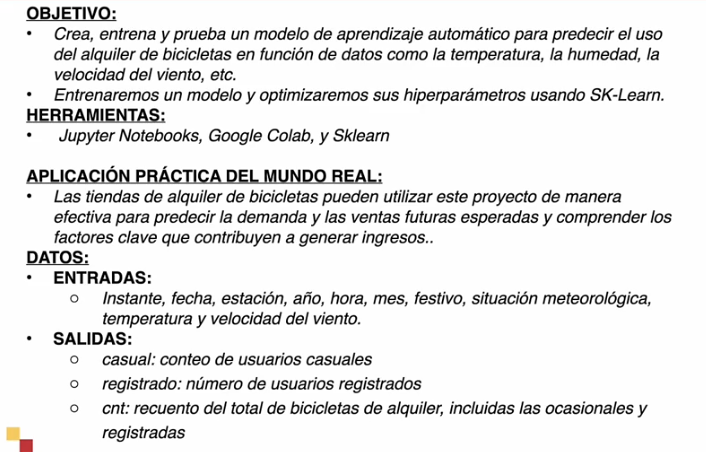

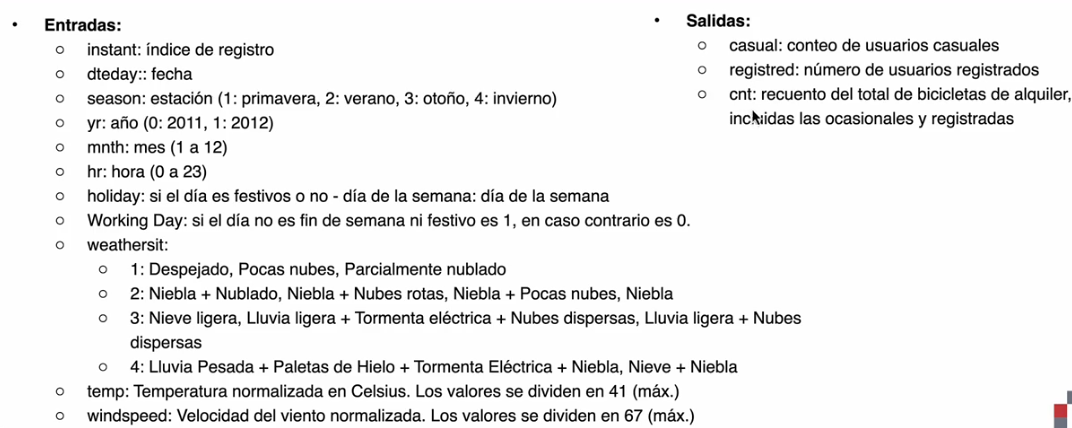

In [1]:
'''

For the optimization of model hyperparameters we are going to do differents steps:

Step 1: model creation
Step 2: model training
Step 3: model testing (forecasting bikes usage)
Step 4: model boosting based on hyperparameters optimization

Main difference between Hyperparameter and Parameter

Hyperparameter: are stablished before model training process like learning_rate, layer number...
Parameter: are calculated in model training process like slope, weights, bias...

The learning rate is a hyperparameter that represents the size of the steps taken, which indicates how aggressive we want to be in updating the parameters.

If the learning rate increases, the area covered in the search space will increase, so we could reach the global minimum faster. However, we may overshoot the target.
For small learning rates, training will take much longer to reach optimized weight values.

'''

'\n\nFor the optimization of model hyperparameters we are going to do differents steps:\n\nStep 1: model creation\nStep 2: model training\nStep 3: model testing (forecasting bikes usage)\nStep 4: model boosting based on hyperparameters optimization\n\nMain difference between Hyperparameter and Parameter\n\nHyperparameter: are stablished before model training process like learning_rate, layer number...\nParameter: are calculated in model training process like slope, weights, bias...\n\nThe learning rate is a hyperparameter that represents the size of the steps taken, which indicates how aggressive we want to be in updating the parameters.\n\nIf the learning rate increases, the area covered in the search space will increase, so we could reach the global minimum faster. However, we may overshoot the target.\nFor small learning rates, training will take much longer to reach optimized weight values.\n\n'

In [2]:
'''
There are a lot of strategies for hyperparameter optimization, but we are only focusing on three of them:


GRID SEARCH
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'col_sample_by_tree': [0.3, 0.7, 1.0]
}

GridSearch works by testing all possible combinations of the specified hyperparameters.
For each combination, the model is trained and evaluated in order to identify the one that optimizes the objective variable
either by maximizing a performance metric like accuracy or minimizing a loss function such as mean squared error.
This exhaustive search ensures that the best set of hyperparameters is selected based on the defined evaluation criteria.




RANDOM SEARCH
Grid Search is complete but slow when there are many options, while Randomized Search is faster and gives good results by testing only some random combinations.

BAYESIAN OPTIMIZATION

Bayesian Optimization is an intelligent method for finding the best hyperparameters by learning from past tests.
Unlike Grid Search, which tries every combination, or Randomized Search, which tests random samples, Bayesian Optimization builds a model to predict which hyperparameters might work best.
It uses this model to choose new hyperparameters to try, focusing on promising areas and improving results faster.
This makes it more efficient and faster, especially when searching in large or complex spaces.



'''

"\nThere are a lot of strategies for hyperparameter optimization, but we are only focusing on three of them:\n\n\nGRID SEARCH\nparam_grid = {\n    'max_depth': [3, 6, 10],\n    'learning_rate': [0.01, 0.05, 0.1],\n    'n_estimators': [100, 500, 1000],\n    'col_sample_by_tree': [0.3, 0.7, 1.0]\n}\n\nGridSearch works by testing all possible combinations of the specified hyperparameters. \nFor each combination, the model is trained and evaluated in order to identify the one that optimizes the objective variable\neither by maximizing a performance metric like accuracy or minimizing a loss function such as mean squared error. \nThis exhaustive search ensures that the best set of hyperparameters is selected based on the defined evaluation criteria.\n\n\n\n\nRANDOM SEARCH\nGrid Search is complete but slow when there are many options, while Randomized Search is faster and gives good results by testing only some random combinations.\n\nBAYESIAN OPTIMIZATION\n\nBayesian Optimization is an intel

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# import csv
bike_df = pd.read_csv('/content/bike_sharing_daily.csv')

In [5]:
# dataframe
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [6]:
# mean casual, registered and total bikes
bike_df[['casual','registered','cnt']].describe().round(2).loc['mean']

,mean
casual,848.18
registered,3656.17
cnt,4504.35


<Axes: >

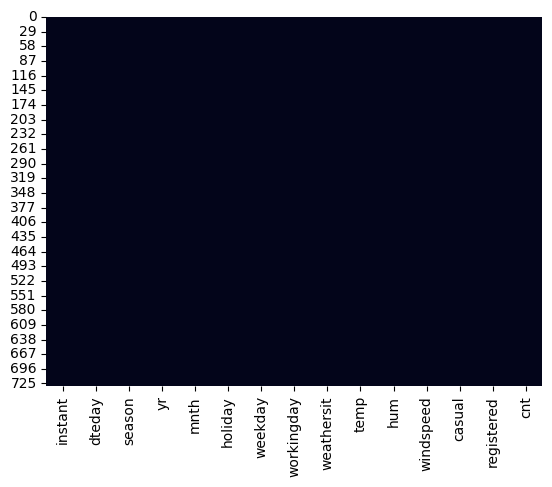

In [7]:
# is null data heatmap
sns.heatmap(bike_df.isnull(), cbar=False)

In [8]:
bike_df.drop(labels=['instant','casual','registered'],axis=1, inplace=True)
bike_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [9]:
# change dteday from object to datetime format
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'], format='%m/%d/%Y')

In [10]:
bike_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [11]:
# set dteday as index
bike_df.index = pd.DatetimeIndex(bike_df['dteday'])

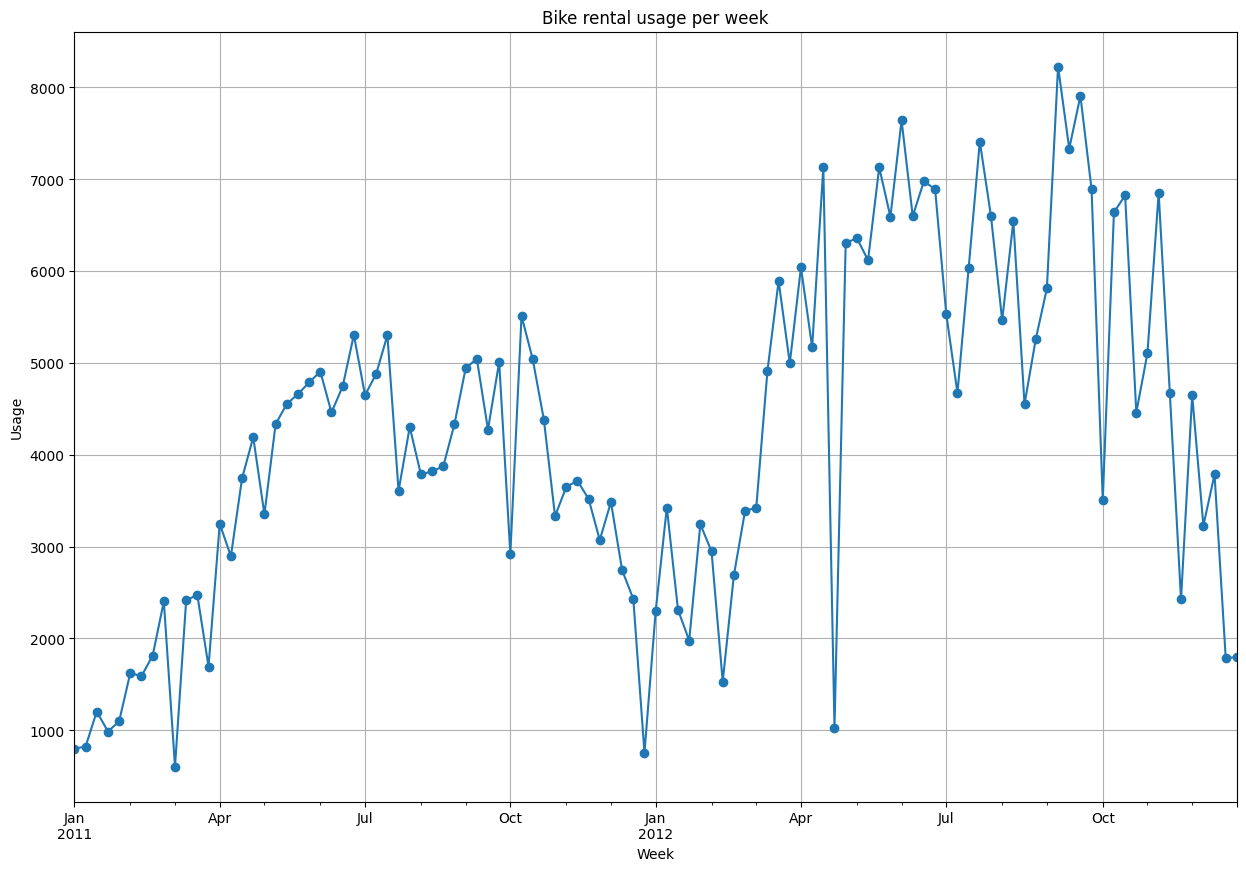

In [12]:
# plot representation above weekly frequency
plt.figure(figsize=(15,10))
bike_df['cnt'].asfreq('W').plot(marker='o', grid=True)
plt.title('Bike rental usage per week')
plt.xlabel('Week')
plt.ylabel('Usage')
plt.show()

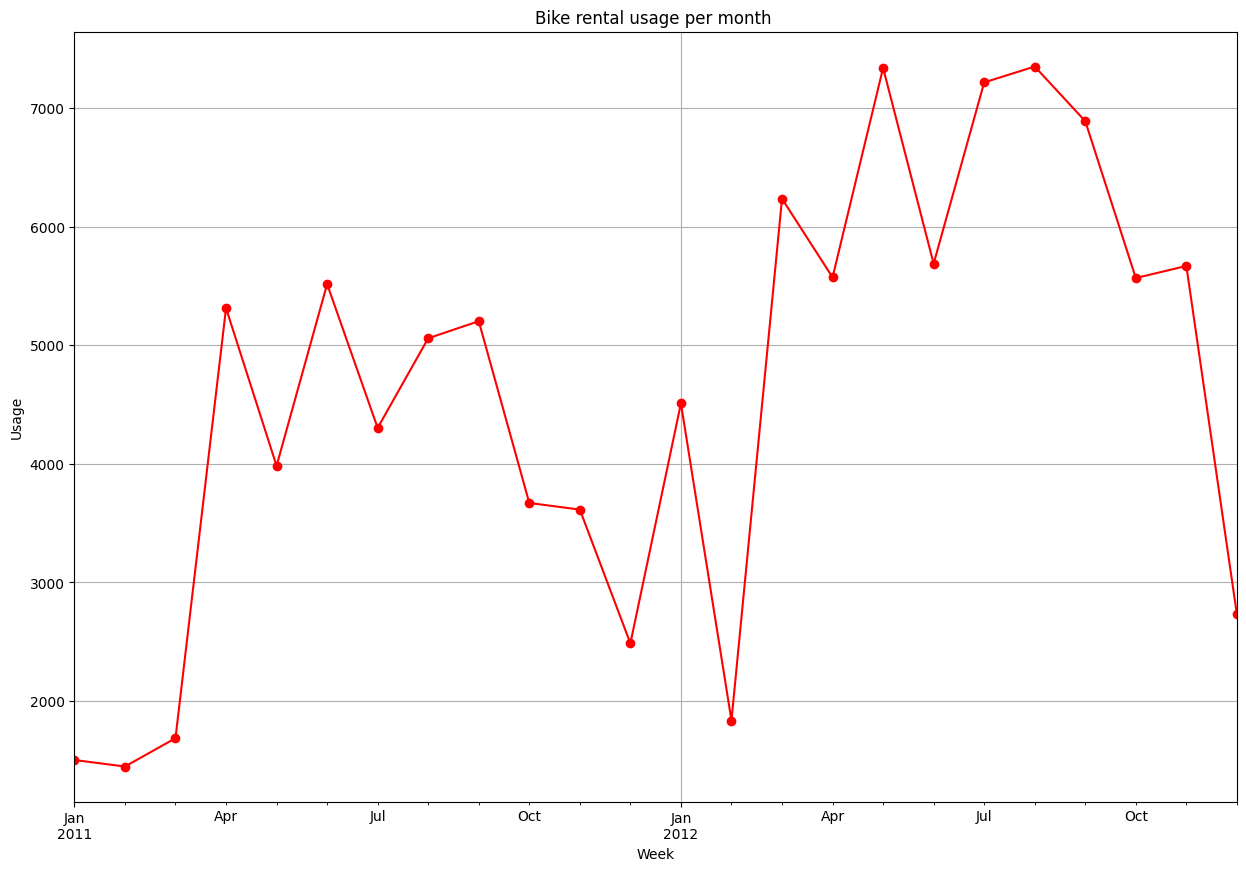

In [13]:
# plot representation above weekly frequency
plt.figure(figsize=(15,10))
bike_df['cnt'].asfreq('M').plot(marker='o', grid=True, color='red')
plt.title('Bike rental usage per month ')
plt.xlabel('Week')
plt.ylabel('Usage')
plt.show()

In [14]:
# select only numerical variables
X_numerical = bike_df[['temp','hum','windspeed','cnt']]
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


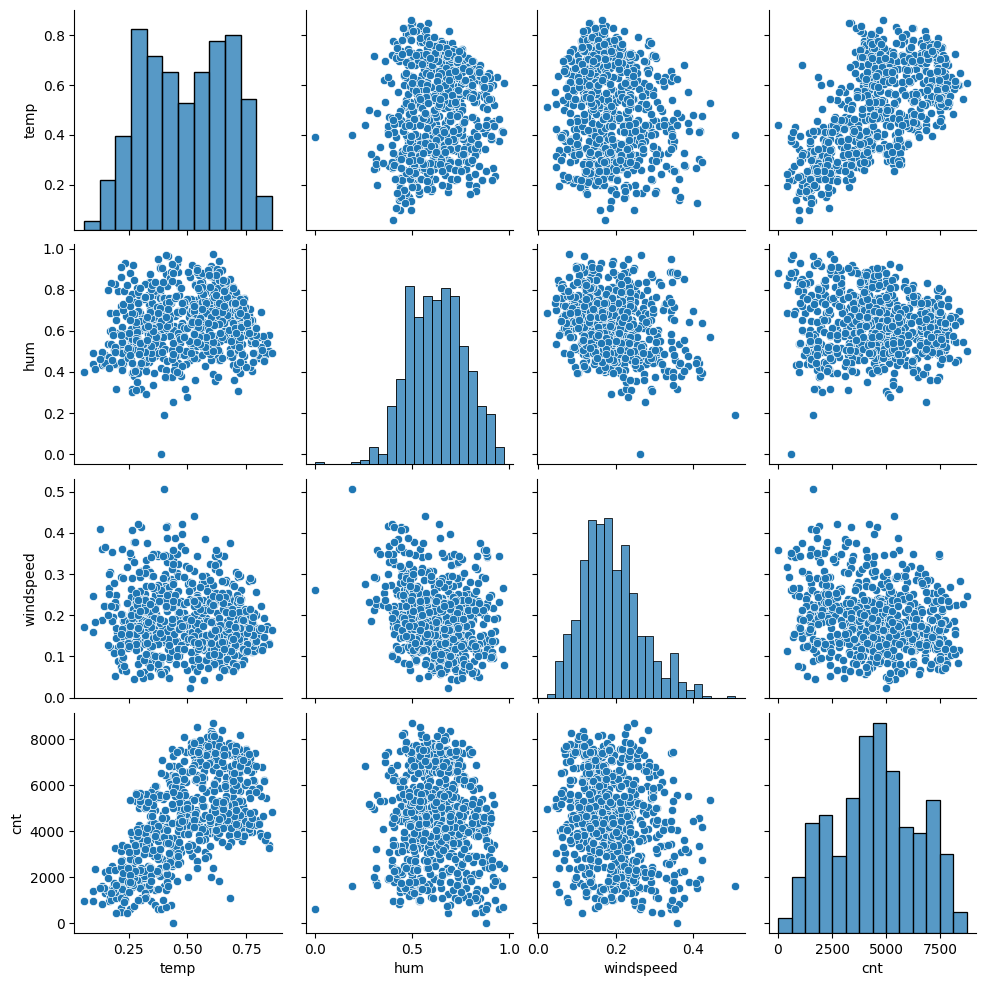

In [15]:
# pairplot above numerical variables and total bikes 'cnt'
sns.pairplot(X_numerical)

<Axes: >

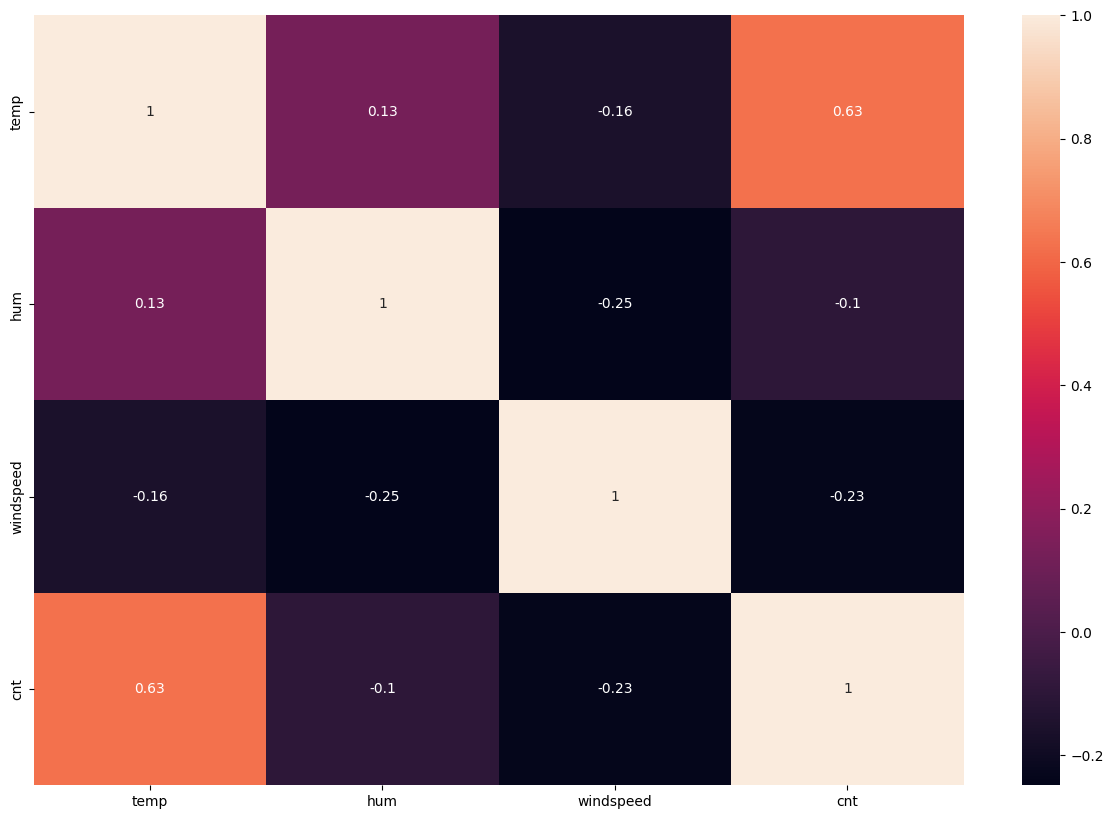

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(X_numerical.corr(), annot=True)

Text(0, 0.5, 'Usage')

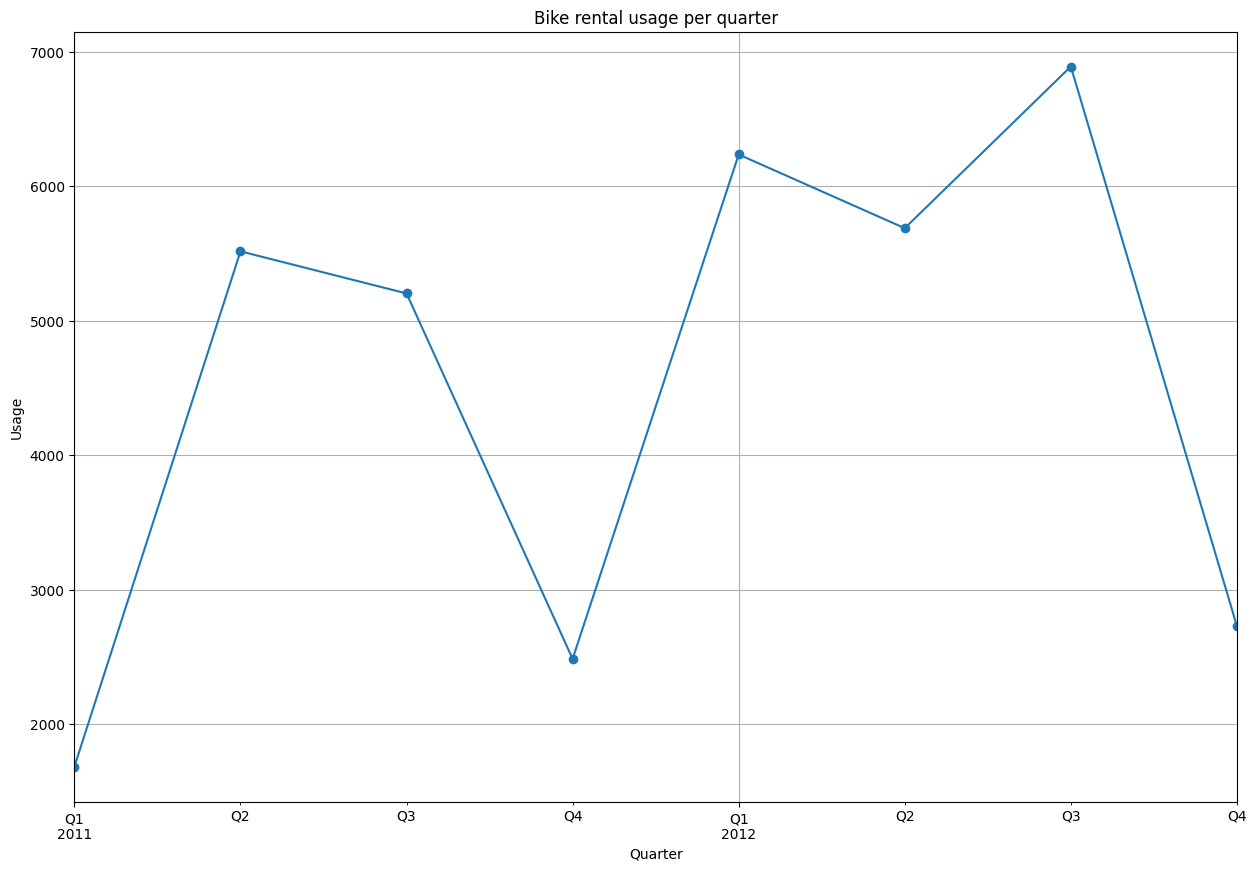

In [17]:
# quarterly bikes usage
plt.figure(figsize=(15,10))
bike_df['cnt'].asfreq('Q').plot(marker='o', grid=True)
plt.title('Bike rental usage per quarter')
plt.xlabel('Quarter')
plt.ylabel('Usage')

In [18]:
# Divide original raw data by train ans test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [19]:
X_categorical = bike_df[['season','yr','mnth','holiday','weekday','workingday','weathersit']]
X_categorical

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


In [20]:
# treatment of categorical variables with onehotencoder to create an array of categorial variables
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_categorical)
X_cat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5117 stored elements and shape (731, 32)>

In [31]:
X_cat_array = X_cat.toarray()
X_categorical = pd.DataFrame(X_cat_array)

In [22]:
 X_numerical = X_numerical.reset_index()

In [32]:
X_all = pd.concat([X_numerical, X_categorical], axis=1)
X_all

,dteday,temp,hum,windspeed,cnt,0,1,2,3,4,...,22,23,24,25,26,27,28,29,30,31
0,2011-01-01,0.344167,0.805833,0.160446,985,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,2011-01-02,0.363478,0.696087,0.248539,801,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2011-01-03,0.196364,0.437273,0.248309,1349,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2011-01-04,0.200000,0.590435,0.160296,1562,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2011-01-05,0.226957,0.436957,0.186900,1600,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,0.254167,0.652917,0.350133,2114,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
727,2012-12-28,0.253333,0.590000,0.155471,3095,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
728,2012-12-29,0.253333,0.752917,0.124383,1341,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
729,2012-12-30,0.255833,0.483333,0.350754,1796,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [39]:
X_all.drop(labels=['dteday'], axis=1, inplace=True)

In [40]:
X = X_all.iloc[:,:-1].values
y = X_all.iloc[:, -1:].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [43]:
# create model using xg-boost algorithm for model training and traind model
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=1, max_depth=20, n_estimators=500)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
# model testing
y_predict = model.predict(X_test)

In [45]:
# accuracy

result = model.score(X_train, y_train)
print('Accuracy model: {}'.format(result))

Accuracy model: 0.9999991348351501


In [46]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE: {}'.format(RMSE))
print('MSE: {}'.format(MSE))
print('MAE: {}'.format(MAE))
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(adj_r2))

RMSE: 0.084
MSE: 0.007032896703325397
MAE: 0.008168786908683404
R2: 0.7343114250661564
Adjusted R2: 0.6505357482852148


In [47]:
# Grid Search optimization

parameters_grid = {'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'colsample_bytree': [0.3, 0.7, 1.0]}

In [48]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
model = xgb.XGBRegressor(objective='reg:squarederror')

In [49]:
xgb_grid = GridSearchCV(estimator=model,
            param_grid=parameters_grid,
            scoring='neg_mean_squared_error',
            cv=5,
            verbose=5)

In [50]:
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.036 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.012 total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.012 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.016 total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=100;, score=-0.021 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-0.019 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-0.008 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500;, score=-0.006 total

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=5)

In [51]:
# select the best parameters (best combination)

xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 1000}

In [52]:
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE: {}'.format(RMSE))
print('MSE: {}'.format(MSE))
print('MAE: {}'.format(MAE))
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(adj_r2))

RMSE: 0.084
MSE: 0.007032896703325397
MAE: 0.008168786908683404
R2: 0.7343114250661564
Adjusted R2: 0.6505357482852148


In [54]:
# Random Search optimization

from sklearn.model_selection import RandomizedSearchCV

grid = {
    'n_estimators': [100,500,700],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.5, 1],
    'min_child_weight': [1,2,3],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'booster': ['gbtree', 'gblinear']
}


In [55]:
model = xgb.XGBRegressor(objective='reg:squarederror')

In [56]:
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=grid,
                               cv=5,
                               n_iter=50,
                               scoring='neg_mean_absolute_error',
                               verbose=5,
                               return_train_score=True)

random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END booster=gbtree, colsample_bytree=1.0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500;, score=(train=-0.003, test=-0.016) total time=   0.3s
[CV 2/5] END booster=gbtree, colsample_bytree=1.0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500;, score=(train=-0.002, test=-0.008) total time=   0.3s
[CV 3/5] END booster=gbtree, colsample_bytree=1.0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500;, score=(train=-0.003, test=-0.007) total time=   0.6s
[CV 4/5] END booster=gbtree, colsample_bytree=1.0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500;, score=(train=-0.002, test=-0.011) total time=   0.2s
[CV 5/5] END booster=gbtree, colsample_bytree=1.0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500;, score=(train=-0.003, test=-0.006) total time=   0.3s
[CV 1/5] END booster=gblinear, colsample_bytree=0.7, 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.3, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.5, 1],
                                        'max_depth': [3, 6, 10],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [100, 500, 700]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=5)

In [57]:
random_cv.best_estimator_

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
y_predict=random_cv.predict(X_test)

In [59]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE: {}'.format(RMSE))
print('MSE: {}'.format(MSE))
print('MAE: {}'.format(MAE))
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(adj_r2))

RMSE: 0.0
MSE: 8.07586680824353e-11
MAE: 6.524478497148371e-06
R2: 0.9999999969491012
Adjusted R2: 0.9999999959871061
